# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [6]:
import pandas as pd 

archive = pd.read_csv('twitter-archive-enhanced.csv')

archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
import requests

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

open('image_predictions.tsv','wb').write(r.content)


335079

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [42]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


consumer_key = 'redact'
consumer_secret = 'redact'
access_token = 'redact'
access_secret = 'redact'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = archive.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 732


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Rate limit reached. Sleeping for: 732


Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
18

In [231]:
#load the JSON file into a panda's dataframe

import pandas as pd  

twitter_df = pd.read_json('tweet_json.json', lines=True)

#prune the dataframe to only reflect Tweet_ID, retweet_count, and Favorite_count

twitter_df = twitter_df[['id','retweet_count', 'favorite_count']]

twitter_df.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,7114,34250


In [232]:
#convert image predictions TSV to a pandas dataframe

image_predict = pd.read_csv('image_predictions.tsv', sep='\t')

image_predict.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
1. The rating denominator should always be 10, this is part of 'we rate dogs' schtick, each dog is 100% or more! 

2. The rating numerator should be some incremental number higher than 10 but less than 20. There are some numerators that are three digit numbers. 

3. The source should be a plain English string so we can easily view the technology used to upload the content

4. Each tweet should have a photo

5. We rate dogs is a very popular twitter handle, it is completely unlikely that any number of tweets has a favorite count of 0

6. We rate dogs is very popular twitter handle it is unlikely that the number of retweets for any one tweet is less than 100

7. Every tweet should be of a dog 

8. Some of these are retweets

Further visual assessment can be found in the attached report.  

In [233]:
#find how many denominators do not equal 10, a visual assesment indicated there were at least a few   

archive.query('rating_denominator != 10').rating_denominator.count()

23

In [234]:
# determine how many numerators are more than 20 or less than 10       

archive.query('rating_numerator > 20 or rating_numerator < 10').rating_numerator.count()

464

In [248]:
#Look at the source column, notice that there are a lot of iPhones, but the text is uglied up with HTML.

archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [249]:
#Tweets with images must have an expanded URL 

print(archive['expanded_urls'].isnull().sum())
    
   


59


In [250]:
#check for tweets with a favorite count of zero       

twitter_df.query('favorite_count == 0').favorite_count.count()

161

In [251]:
#check for tweets with a retweet count of less than 100    

twitter_df.query('retweet_count < 100').retweet_count.count()

122

In [252]:
#check for non-dogs 

image_predict.query('p1_dog == False').p1_dog.count()


543

In [253]:
#check for retweets   

print(archive['retweeted_status_id'].notnull)

<bound method Series.notnull of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: retweeted_status_id, Length: 2356, dtype: float64>


### Tidiness issues
1. There are more columns than we need for the analysis we want. For example, we don't really care about the URL of each tweet. 

2. We have three different dataframes, we should merge the dataframes into one that includes the tweet information and the probable breed of dog. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [498]:
# Make copies of original pieces of data

# Copy the JSON scrape

twitter_df_cl = twitter_df.copy()

#make a copy of the image prediction archive

image_predict_cl = image_predict.copy()

# make a copy of the archive

archive_cl = archive.copy()

### Issue #1:

#### Define:

The schtick that WeRateDogs engages in is that every dog is 'better' than 100%, therefore if the denominator must always be 10. Drop entries where the denominator does not equal 10. 

#### Code

In [499]:
# overwrite archive_cl with a dataframe that only includes ratings with a denominator of 10   

archive_cl = archive_cl[archive_cl.rating_denominator == 10]

#### Test

In [500]:
# We identified 23 instances in our programmatic assesment of instances of the denominator being something other than 10, re-running that code should now show 0

archive_cl.query('rating_denominator != 10').rating_denominator.count()

0

### Issue #2:

#### Define

Similarly to above, there are some numerators that are way out of whack, in that the numerator should be some digit over 10 but less than 20. Some tweets do jokingly refer to larger integers (like 420 which is a cheeky reference to cannabis) but for our purposes we will drop entries that do not conform to our standards. 

#### Code

In [501]:
archive_cl = archive_cl.query('rating_numerator <= 20 and rating_numerator > 10')

#### Test

In [502]:
# in our programatic assessment we determined there were some 464 times when the numerator was out of bounds for some reason. There should be zero after this code. 

archive_cl.query('rating_numerator > 20 or rating_numerator < 10').rating_numerator.count()

0

### Issue #3:

#### Define

The source column contains interesting information about the technology that is used to upload the content. Clean the HTML off and replace with plain english text, i.e. 'iPhone'.  

#### Code

In [503]:
#use a regular expression to extract the simple text after the > symbol and before the </a> symbol.  

archive_cl['source'] = archive_cl['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [504]:
# The archive column should have english text that makes more sense. 

archive_cl.source.value_counts()

Twitter for iPhone     1334
Vine - Make a Scene      71
Twitter Web Client       17
TweetDeck                 7
Name: source, dtype: int64

### Issue #4:

#### Define

We want only tweets that have a photo. Our visual and programmatic assesments indicate there are a number or tweets without photos. 

#### Code

In [505]:
#Drop tweets from the archive that do not have images, to do this we will drop rows that do not have an expanded URL section

archive_cl = archive_cl[archive_cl['expanded_urls'].notnull()]

#### Test

In [506]:
# sum up how many expanded URLs are zero, there should be none, and

archive_cl['expanded_urls'].isnull().sum()

0

### Issue #5:

#### Define

During the visual phase we noticed that in the favorites column, some tweets had zero favorites. That is almost surely a mistake. We will drop those rows. 

#### Code

In [507]:
#drop rows where the favorite is zero

twitter_df_cl = twitter_df_cl.query('favorite_count != 0')

#### Test

In [508]:
#requery and make sure the response is zero

twitter_df_cl.query('favorite_count == 0').favorite_count.count()

0

### Issue #6:  

#### Define

Similarly, it is unlikely any retween number will be less than 100 

#### Code

In [509]:
twitter_df_cl = twitter_df_cl.query('retweet_count > 100')

#### Test

In [510]:
# should return zero 

twitter_df_cl.query('retweet_count < 100').retweet_count.count()

0

### Issue #7:  

## Define:

In the image prediction file, not every tweet was of an actual dog. Some of the group of tweets were of dogs but due to the irreverent nature of this handle, they actually were. Some tweets were not of dogs, and for those we will remove all rows that don't have a P1 that is a type of dog. P2 and P3 analysis seem to be poorly correlated, so we will only consider the highest confidence. 

### Code: 

In [511]:
image_predict_cl = image_predict_cl.query('p1_dog == True')

### Test:

In [512]:
# should return zero  

image_predict_cl.query('p1_dog != True').p1_dog.count()

0

## Issue 8:

### Define:

Remove all retweets and replies, we only want to see original tweets

### Code:

In [513]:
archive_cl = archive_cl[archive_cl['retweeted_status_id'].isnull()]
archive_cl = archive_cl[archive_cl['in_reply_to_status_id'].isnull()]




### Test:

In [514]:
archive_cl.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Tidy Issue # 1

### Define: 

The information we want is the tweet ID, the realistic rating, the favorite and retweet counts, and the breed of dog. This is assuming we want to get inforation like what breed of dogs get the most attention or what breed of dog is uploaded the most. We don't have a reliable name for each dog, that isn't a failure of the culling process because you can only cull what is broadcast, and for a significant chunk of those tweets there are no names associated with the tweet. Similarly, we don't really care about the humorous categorization of dogs because many of them simply don't have any at all. We would cull too much data by eliminating or attempting to categorize based on that factor. 

In [515]:
#drop unneeded columns in the archive
archive_cl = archive_cl.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id',
                              'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [516]:
#In the image prediction dataframe, we already dropped everything that wasn't a dog, so it isn't necessary to keep the p1_dog column, we don't care about P2 and P3, 
#or the JPG_URL, only keep the tweet ID and P1, then rename P1 to 'Breed'

image_predict_cl = image_predict_cl.drop(['jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

image_predict_cl.rename({'p1':'Breed'}, inplace=True)

image_predict_cl.head(1)

,tweet_id,p1
0,666020888022790149,Welsh_springer_spaniel


In [517]:
image_predict_cl.rename({'p1':'Breed'}, axis=1, inplace=True)

twitter_df_cl.rename({'id': 'tweet_id'}, axis =1, inplace=True)

image_predict_cl.head(1)

,tweet_id,Breed
0,666020888022790149,Welsh_springer_spaniel


In [518]:
archive_cl.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10


## Tidy Issue # 2

### Define:

Now that we have an understanding of the kinds of information we can get from this data, we have too many dataframes. Each row should be one datapoint/observation, in this case a tweet that corresponds with a dog that has a picture. Each column will be some bit of data abou that one tweet with a dog. For our purposes, those bits of information will be the tweet id, the uploading device, the rating, the tweet favorite and retween count, and the dog breed.   

In [519]:
#merge two of the three 

archive_cl = pd.merge(left=archive_cl, right=twitter_df_cl, how='left', on='tweet_id')

archive_cl.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,7114.0,34250.0


In [520]:
image_predict_cl.rename({'id': 'tweet_id'}, axis=1, inplace=True)
image_predict_cl.head(1)

,tweet_id,Breed
0,666020888022790149,Welsh_springer_spaniel


In [521]:
twitter_archive_master = pd.merge(left=archive_cl, right=image_predict_cl, how='left', on='tweet_id')

twitter_archive_master.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,retweet_count,favorite_count,Breed
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,7114.0,34250.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,5358.0,29687.0,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,3525.0,22359.0,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,7315.0,37426.0,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,7860.0,35759.0,basset
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,2641.0,18053.0,Chesapeake_Bay_retriever
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,1692.0,10504.0,Appenzeller
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,15996.0,57595.0,Pomeranian
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,3665.0,24860.0,Irish_terrier
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,6176.0,28326.0,Pembroke


In [522]:
#drop null rows, null rows appear because there isn't perfect matchup from between the archives
twitter_archive_master = twitter_archive_master[twitter_archive_master['Breed'].notnull()]
twitter_archive_master = twitter_archive_master[twitter_archive_master['retweet_count'].notnull()]
twitter_archive_master = twitter_archive_master[twitter_archive_master['favorite_count'].notnull()]


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [523]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np

twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [3]:
twitter_archive_master['source'].value_counts()

Twitter for iPhone    876
Twitter Web Client      7
TweetDeck               5
Name: source, dtype: int64

In [4]:
twitter_archive_master['rating_numerator'].mean() 

11.938063063063064

In [5]:
twitter_archive_master['Breed'].value_counts()

golden_retriever           105
Pembroke                    74
Labrador_retriever          58
Chihuahua                   45
Samoyed                     34
                          ... 
curly-coated_retriever       1
black-and-tan_coonhound      1
Australian_terrier           1
Appenzeller                  1
Scottish_deerhound           1
Name: Breed, Length: 103, dtype: int64

In [6]:
grp1 = twitter_archive_master.groupby('Breed')

grp2 = grp1.agg({'favorite_count' : 'median'})

grp2 = grp2.sort_values(by='favorite_count')

grp2

,favorite_count
Breed,
Scottish_deerhound,1174.0
Maltese_dog,1704.0
standard_schnauzer,1719.0
English_springer,1930.0
Tibetan_terrier,2084.0
...,...
Irish_water_spaniel,20344.0
flat-coated_retriever,20393.0
giant_schnauzer,29554.0


### Insights:
1. In this set of data, the iphone is wildly more popular than any other method

2. The average dog is only about 120%  

3. The Golden Retriever is the most popular submission, but the highest median favorite score goes to the standard poodle, even though it only appears twice

### Visualization

In [29]:
top_breeds = twitter_archive_master[twitter_archive_master != 'none'].Breed.value_counts().head(10)

print(top_breeds)

golden_retriever      105
Pembroke               74
Labrador_retriever     58
Chihuahua              45
Samoyed                34
chow                   34
Pomeranian             26
toy_poodle             25
pug                    22
cocker_spaniel         19
Name: Breed, dtype: int64


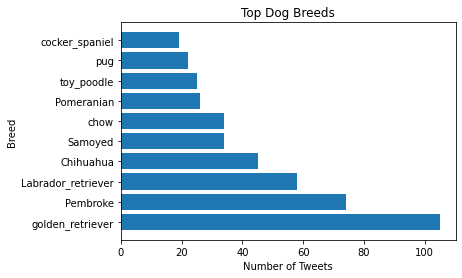

In [31]:
plt.barh(top_breeds.index, top_breeds)
plt.xlabel('Number of Tweets')
plt.ylabel('Breed')
plt.title('Top Dog Breeds')
plt.show();